In [1]:
import os
# Assign training and validation set directories
base_dir = '../../data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
    '''Creates a CNN with 4 convolutional layers'''
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=1e-4),
                  metrics=['accuracy'])
    
    return model


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
# Constant for epochs
EPOCHS = 100

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Metal device set to: Apple M1 Pro
Epoch 1/100


2022-04-22 11:45:54.220421: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-22 11:45:54.220577: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-22 11:45:54.374553: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-22 11:45:54.597612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-22 11:45:58.439992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 - 6s - loss: 0.6921 - accuracy: 0.5265 - val_loss: 0.6769 - val_accuracy: 0.6410 - 6s/epoch - 55ms/step
Epoch 2/100
100/100 - 4s - loss: 0.6602 - accuracy: 0.6060 - val_loss: 0.6362 - val_accuracy: 0.6510 - 4s/epoch - 41ms/step
Epoch 3/100
100/100 - 4s - loss: 0.6114 - accuracy: 0.6735 - val_loss: 0.6011 - val_accuracy: 0.6880 - 4s/epoch - 41ms/step
Epoch 4/100
100/100 - 4s - loss: 0.5717 - accuracy: 0.6985 - val_loss: 0.5865 - val_accuracy: 0.6950 - 4s/epoch - 41ms/step
Epoch 5/100
100/100 - 4s - loss: 0.5369 - accuracy: 0.7355 - val_loss: 0.6303 - val_accuracy: 0.6580 - 4s/epoch - 41ms/step
Epoch 6/100
100/100 - 4s - loss: 0.5104 - accuracy: 0.7500 - val_loss: 0.6261 - val_accuracy: 0.6620 - 4s/epoch - 42ms/step
Epoch 7/100
100/100 - 5s - loss: 0.4838 - accuracy: 0.7690 - val_loss: 0.5976 - val_accuracy: 0.6930 - 5s/epoch - 48ms/step
Epoch 8/100
100/100 - 5s - loss: 0.4649 - accuracy: 0.7720 - val_loss: 0.5825 - val_accuracy: 0.7000 - 5s/epoch - 48ms/step
Epoch 9/100
100/100 

In [5]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

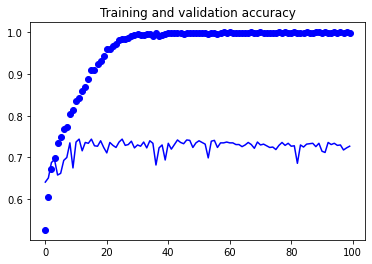

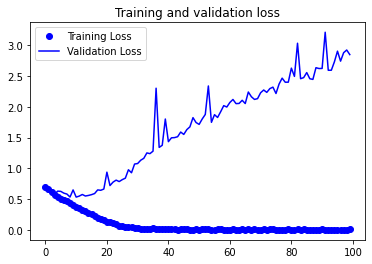

In [6]:
# Plot training results
plot_loss_acc(history)

# Data augmentation
One simple method to avoid overfitting is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too.

What if you tweak with the images a bit -- rotate the image, squash it, etc. That's what image augementation is all about. And there's an API that makes it easy!

Take a look at the ImageDataGenerator which you have been using to rescale the image. There are other properties on it that you can use to augment the image.

'''
    *Updated to do image augmentation
    train_datagen = ImageDataGenerator(
          rotation_range=40,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')
'''

These are just a few of the options available. Let's quickly go over it:

rotation_range is a value in degrees (0–180) within which to randomly rotate pictures.
width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
shear_range is for randomly applying shearing transformations.
zoom_range is for randomly zooming inside pictures.
horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
Run the next cells to see the impact on the results. The code is similar to the baseline but the definition of train_datagen has been updated to use the parameters described above.

In [7]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


2022-04-22 11:53:37.638767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-22 11:53:45.204205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 - 9s - loss: 0.6970 - accuracy: 0.5195 - val_loss: 0.6933 - val_accuracy: 0.5000 - 9s/epoch - 91ms/step
Epoch 2/100
100/100 - 9s - loss: 0.6862 - accuracy: 0.5575 - val_loss: 0.6611 - val_accuracy: 0.6000 - 9s/epoch - 90ms/step
Epoch 3/100
100/100 - 9s - loss: 0.6714 - accuracy: 0.5820 - val_loss: 0.6340 - val_accuracy: 0.6430 - 9s/epoch - 88ms/step
Epoch 4/100
100/100 - 9s - loss: 0.6547 - accuracy: 0.6110 - val_loss: 0.6316 - val_accuracy: 0.6170 - 9s/epoch - 87ms/step
Epoch 5/100
100/100 - 9s - loss: 0.6384 - accuracy: 0.6305 - val_loss: 0.6004 - val_accuracy: 0.6630 - 9s/epoch - 88ms/step
Epoch 6/100
100/100 - 9s - loss: 0.6195 - accuracy: 0.6440 - val_loss: 0.5752 - val_accuracy: 0.7000 - 9s/epoch - 87ms/step
Epoch 7/100
100/100 - 9s - loss: 0.6093 - accuracy: 0.6550 - val_loss: 0.5656 - val_accuracy: 0.7120 - 9s/epoch - 86ms/step
Epoch 8/100
100/100 - 9s - loss: 0.6055 - accuracy: 0.6545 - val_loss: 0.5727 - val_accuracy: 0.6970 - 9s/epoch - 88ms/step
Epoch 9/100
100/100 

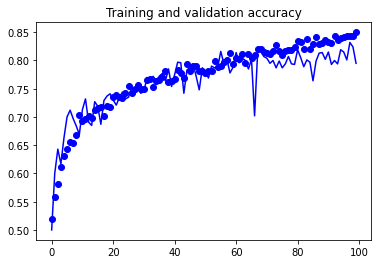

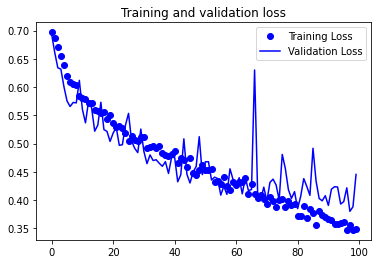

In [8]:
# Plot training results
plot_loss_acc(history_with_aug)